#### Part 1
We start by looking at a simple bandit problem with stationary reward distributions. Consider the socalled k-armed testbed, with k = 10, with normally distributed rewards. Generate a set of ten means
µ1, . . . , µ10 from a N(0, 1) distribution and suppose that the arms 1 through 10 have N(µi, 1) reward
distributions where i = 1, . . . , 10. You goal is to learn the action values corresponding to each of the
10 arms, i.e., the expected rewards q∗(a) for a = 1, . . . 10 using the different methods we discussed for
doing so.
• greedy with non-optimistic initial values. Initialize the action value estimates to 0 and use the
incremental implementation of the simple average method.
• epsilon-greedy with different choices of epsilon. Here, you will need to explain how you choose
the value of ϵ. One option is to use pilot runs: to take a few example bandit problems and try a
few settings of epsilon on these problems to track the evolution of the rewards curve and picking
one that gives good results.
• optimistic starting values with a greedy approach. You may assume you know the means of each
of the reward distributions to help you set the optimistic initial values.
• gradient bandit algorithm. Try different learning rates α and determine a good one through
some pilot runs.
Repeat this for a total of 1000 different bandit problems (i.e., 1000 sets of ten mean parameters)
and report (1) the average reward acquired by the algorithm at each time step (except for the gradient
bandit algorithm) at each time step and (2) the percentage of time the optimal action is taken by the
algorithm, again, at each time step.

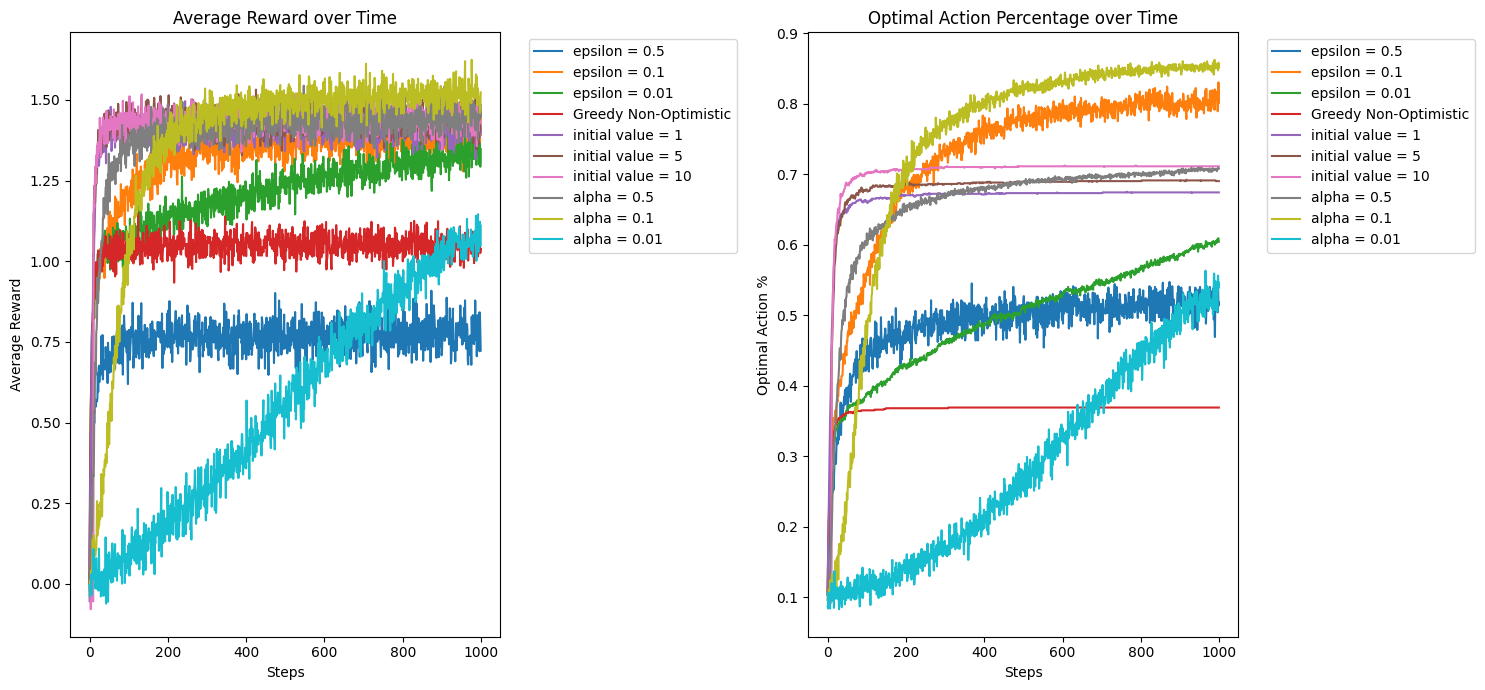

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
k = 10
n_problems = 1000
n_steps = 1000

# Function to generate bandit problems
def generate_bandit_problems(k, n_problems):
    return np.random.randn(n_problems, k)

# Function to run the epsilon-greedy algorithm
def epsilon_greedy(k, n_steps, epsilon, true_means):
    """
    Implement the epsilon-greedy method with optional non-stationarity handling.

    Parameters:
    k (int): Number of actions (arms).
    n_steps (int): Number of steps (iterations) to simulate.
    epsilon (float): Probability of choosing a random action (exploration).
    true_means (numpy.ndarray): True mean rewards for each action.
    change_type (str, optional): Type of non-stationarity, e.g., 'drift', 'mean_reverting', or 'abrupt'.
                                 Defaults to None, indicating no change.

    Returns:
    tuple:
        numpy.ndarray: Array of rewards obtained at each step.
        numpy.ndarray: Array indicating whether the optimal action was selected at each step (1 if selected, 0 otherwise).
    """

    # Initialize Q-values (estimated action values) for each action to zero
    q_values = np.zeros(k)
    # Initialize a counter for each action to keep track of how many times each action has been selected
    action_counts = np.zeros(k)
    # Initialize an array to store the rewards obtained at each step
    rewards = np.zeros(n_steps)

    optimal_action_counts = np.zeros(n_steps)
    
    optimal_action = np.argmax(true_means)
    
    for step in range(n_steps):
        # With probability epsilon, select a random action (exploration)
        # Otherwise, select the action with the highest Q-value (exploitation)
        if np.random.rand() < epsilon:
            action = np.random.choice(k)
        else:
            action = np.argmax(q_values)
        # Generate a reward for the chosen action by adding random noise to its true mean
        reward = np.random.randn() + true_means[action]
        # Increment the counter for the chosen action
        action_counts[action] += 1
        # Update the Q-value for the chosen action using the incremental update formula
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        # Store the obtained reward in the rewards array
        rewards[step] = reward
        # Track if the optimal action was picked
        if action == optimal_action:
            optimal_action_counts[step] = 1
    
    return rewards, optimal_action_counts

# Function to run the greedy algorithm with non-optimistic initial values
def greedy_non_optimistic(k, n_steps, true_means):
    """
    Implement the greedy method with non-optimistic initial values and optional non-stationarity handling.

    Parameters:
    k (int): Number of actions (arms).
    n_steps (int): Number of steps (iterations) to simulate.
    true_means (numpy.ndarray): True mean rewards for each action.
    change_type (str, optional): Type of non-stationarity, e.g., 'drift', 'mean_reverting', or 'abrupt'. Defaults to None, indicating no change.

    Returns:
    tuple:
        numpy.ndarray: Array of rewards obtained at each step.
        numpy.ndarray: Array indicating whether the optimal action was selected at each step (1 if selected, 0 otherwise).
    """
    q_values = np.zeros(k)
    action_counts = np.zeros(k)
    rewards = np.zeros(n_steps)
    optimal_action_counts = np.zeros(n_steps)
    
    optimal_action = np.argmax(true_means)
    
    for step in range(n_steps):
        action = np.argmax(q_values)
        
        reward = np.random.randn() + true_means[action]
        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        
        rewards[step] = reward
        if action == optimal_action:
            optimal_action_counts[step] = 1
    
    return rewards, optimal_action_counts

# Function to run the optimistic initial values algorithm
def optimistic_initial_values(k, n_steps, initial_value, true_means):
    """
    Implement the greedy method with optimistic initial values.

    Parameters:
    k (int): Number of actions (arms).
    n_steps (int): Number of steps (iterations) to simulate.
    initial_value (float): Initial optimistic value for all actions.
    true_means (numpy.ndarray): True mean rewards for each action.

    Returns:
    tuple:
        numpy.ndarray: Array of rewards obtained at each step.
        numpy.ndarray: Array indicating whether the optimal action was selected at each step (1 if selected, 0 otherwise).
    """
    # Initialize Q-values for each action with the optimistic initial value
    q_values = np.ones(k) * initial_value
    
    # Initialize action counts for each action
    action_counts = np.zeros(k)
    
    # Initialize arrays to store rewards and optimal action counts
    rewards = np.zeros(n_steps)
    optimal_action_counts = np.zeros(n_steps)
    
    # Determine the optimal action based on the true means
    optimal_action = np.argmax(true_means)
    
    for step in range(n_steps):
        # Select the action with the highest q-value
        action = np.argmax(q_values)
        
        # Generate reward for the chosen action based on its true mean
        reward = np.random.randn() + true_means[action]
        
        # Increment the count for the chosen action
        action_counts[action] += 1
        
        # Update the Q-value for the chosen action using incremental formula
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        
        # Store the obtained reward
        rewards[step] = reward
        
        # Track if the optimal action was picked
        if action == optimal_action:
            optimal_action_counts[step] = 1
    
    return rewards, optimal_action_counts


# Function to run the gradient bandit algorithm
def gradient_bandit(k, n_steps, alpha, true_means):
    """
    Implement the gradient bandit algorithm.

    Parameters:
    k (int): Number of actions (arms).
    n_steps (int): Number of steps (iterations) to simulate.
    alpha (float): Learning rate for updating preferences.
    true_means (numpy.ndarray): True mean rewards for each action.

    Returns:
    tuple:
        numpy.ndarray: Array of rewards obtained at each step.
        numpy.ndarray: Array indicating whether the optimal action was selected at each step (1 if selected, 0 otherwise).
    """
    # Initialize values for each action to zero
    h_values = np.zeros(k)
    
    # Initialize action probabilities
    action_probs = np.ones(k) / k
    
    # Initialize arrays to store rewards and optimal action counts
    rewards = np.zeros(n_steps)
    optimal_action_counts = np.zeros(n_steps)
    
    # Determine the optimal action based on the true means
    optimal_action = np.argmax(true_means)
    
    for step in range(n_steps):
        # Select an action based on the current action probabilities
        action = np.random.choice(np.arange(k), p=action_probs)
        
        # Generate reward for the chosen action based on its true mean
        reward = np.random.randn() + true_means[action]
        rewards[step] = reward
        
        # Calculate the baseline as the average reward up to the current step
        baseline = np.mean(rewards[:step+1])
        
        # Update preferences based on the received reward
        for a in range(k):
            if a == action:
                h_values[a] += alpha * (reward - baseline) * (1 - action_probs[a])
            else:
                h_values[a] -= alpha * (reward - baseline) * action_probs[a]
        
        # Update action probabilities using the softmax function
        action_probs = np.exp(h_values) / np.sum(np.exp(h_values))
        
        # Track if the optimal action was picked
        if action == optimal_action:
            optimal_action_counts[step] = 1
    
    return rewards, optimal_action_counts

# Run experiments
true_means_set = generate_bandit_problems(k, n_problems)
epsilons = [0.5, 0.1, 0.01]
alphas = [0.5, 0.1, 0.01]
initial_values = [1, 5, 10]

n_methods = len(epsilons) + len(alphas) + len(initial_values) + 1  # +1 for greedy non-optimistic
avg_rewards = np.zeros((n_methods, n_steps))
optimal_action_counts = np.zeros((n_methods, n_steps))

for problem in range(n_problems):
    true_means = true_means_set[problem]
    
    # Run epsilon-greedy with different epsilons
    for i, epsilon in enumerate(epsilons):
        rewards, optimal_counts = epsilon_greedy(k, n_steps, epsilon, true_means)
        avg_rewards[i] += rewards
        optimal_action_counts[i] += optimal_counts
    
    # Run greedy with non-optimistic initial values
    rewards, optimal_counts = greedy_non_optimistic(k, n_steps, true_means)
    avg_rewards[len(epsilons)] += rewards
    optimal_action_counts[len(epsilons)] += optimal_counts
    
    # Run optimistic initial values with different initial values
    for j, initial_value in enumerate(initial_values):
        rewards, optimal_counts = optimistic_initial_values(k, n_steps, initial_value, true_means)
        avg_rewards[len(epsilons) + 1 + j] += rewards
        optimal_action_counts[len(epsilons) + 1 + j] += optimal_counts
    
    # Run gradient bandit with different alphas
    for l, alpha in enumerate(alphas):
        rewards, optimal_counts = gradient_bandit(k, n_steps, alpha, true_means)
        avg_rewards[len(epsilons) + 1 + len(initial_values) + l] += rewards
        optimal_action_counts[len(epsilons) + 1 + len(initial_values) + l] += optimal_counts

# Average results over all problems
avg_rewards /= n_problems
optimal_action_counts /= n_problems

# Plot results
plt.figure(figsize=(15, 7))

# Plot average rewards
plt.subplot(1, 2, 1)
for i, epsilon in enumerate(epsilons):
    plt.plot(avg_rewards[i], label=f'epsilon = {epsilon}')
plt.plot(avg_rewards[len(epsilons)], label='Greedy Non-Optimistic')
for j, initial_value in enumerate(initial_values):
    plt.plot(avg_rewards[len(epsilons) + 1 + j], label=f'initial value = {initial_value}')
for l, alpha in enumerate(alphas):
    plt.plot(avg_rewards[len(epsilons) + 1 + len(initial_values) + l], label=f'alpha = {alpha}')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Average Reward over Time')

# Plot optimal action counts
plt.subplot(1, 2, 2)
for i, epsilon in enumerate(epsilons):
    plt.plot(optimal_action_counts[i], label=f'epsilon = {epsilon}')
plt.plot(optimal_action_counts[len(epsilons)], label='Greedy Non-Optimistic')
for j, initial_value in enumerate(initial_values):
    plt.plot(optimal_action_counts[len(epsilons) + 1 + j], label=f'initial value = {initial_value}')
for l, alpha in enumerate(alphas):
    plt.plot(optimal_action_counts[len(epsilons) + 1 + len(initial_values) + l], label=f'alpha = {alpha}')
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Optimal Action Percentage over Time')

plt.tight_layout()
plt.show()


#### Gradual changes
Try applying (1) a drift change
µt = µt⊔1 + ϵt
where ϵt is N(0, 0.0012
) and separately (2) a mean-reverting change
µt = κµt⊔1 + ϵt
where κ = 0.5 and ϵt is N(0, 0.012
) to the mean parameters as you do the training. Note that we use
the mean-variance parametrization of the normal distribution throughout.
#### Abrupt changes
At each time step, with probability 0.005, permute the means corresponding to each of the reward
distributions.

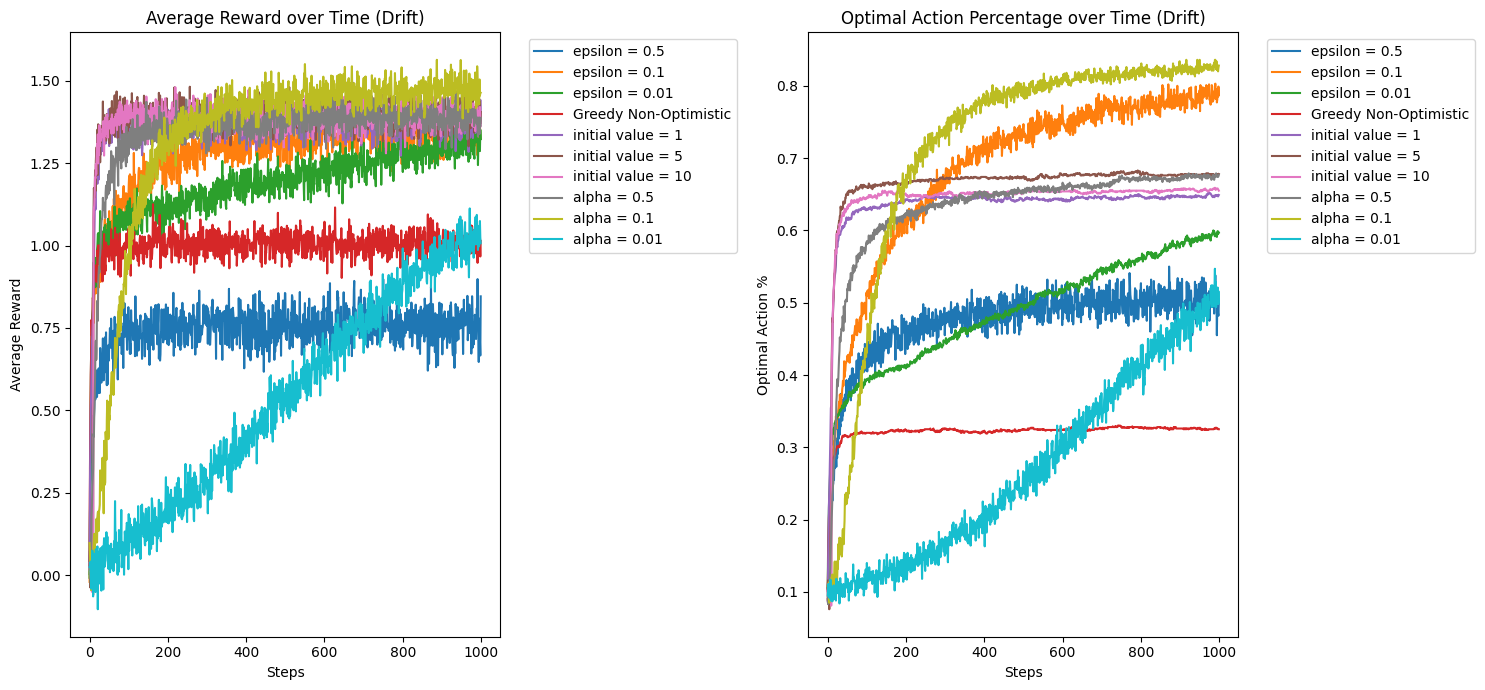

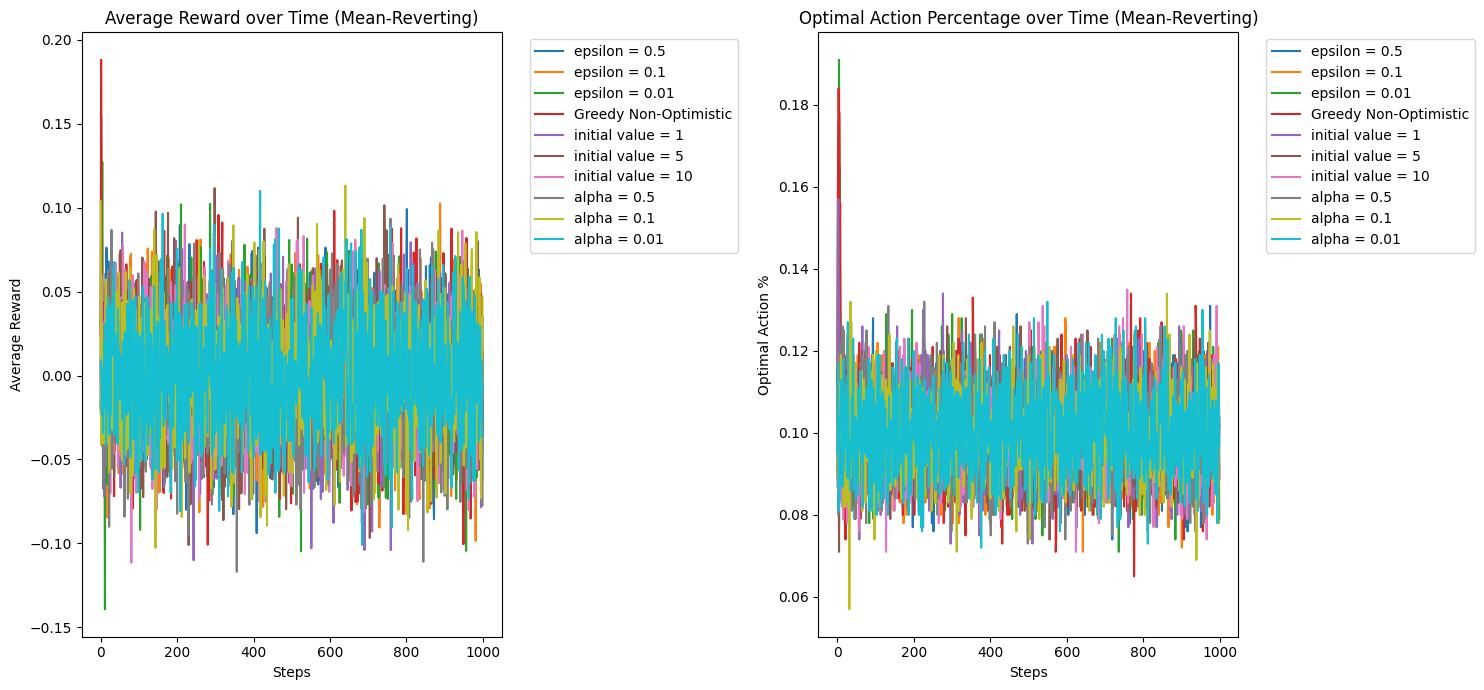

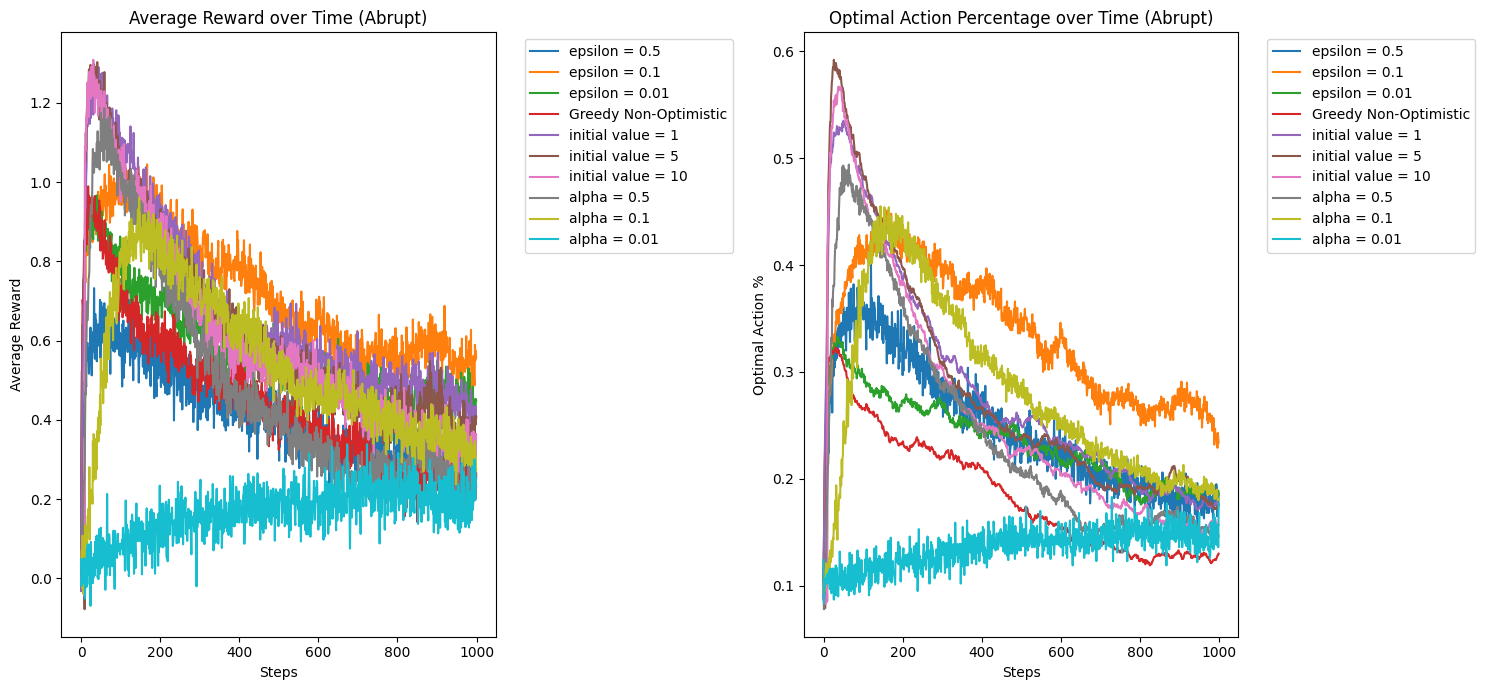

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
k = 10
n_problems = 1000
n_steps = 1000
drift_std = 0.001
mean_reverting_std = 0.01
kappa = 0.5
abrupt_change_prob = 0.005

# Function to generate bandit problems
def generate_bandit_problems(k, n_problems):
    return np.random.randn(n_problems, k)

# Function to apply drift change to the true means
def apply_drift(true_means):
    """
    Apply a small random drift to the true means.

    Parameters:
    true_means (numpy.ndarray): Current true means of the actions.

    Returns:
    numpy.ndarray: True means after applying the drift.
    """
    return true_means + np.random.normal(0, drift_std, true_means.shape)

# Function to apply mean-reverting change to the true means
def apply_mean_reverting(true_means):
    """
    Apply a mean-reverting change to the true means.

    Parameters:
    true_means (numpy.ndarray): Current true means of the actions.

    Returns:
    numpy.ndarray: True means after applying the mean-reverting change.
    """
    return kappa * true_means + np.random.normal(0, mean_reverting_std, true_means.shape)

# Function to apply abrupt change to the true means
def apply_abrupt_change(true_means):
    if np.random.rand() < abrupt_change_prob:
        np.random.shuffle(true_means)
    return true_means

# Function to run the epsilon-greedy algorithm
def epsilon_greedy(k, n_steps, epsilon, true_means, change_type=None):
    """
    Implement the epsilon-greedy method with optional non-stationarity handling.

    Parameters:
    k (int): Number of actions (arms).
    n_steps (int): Number of steps (iterations) to simulate.
    epsilon (float): Probability of choosing a random action (exploration).
    true_means (numpy.ndarray): True mean rewards for each action.
    change_type (str, optional): Type of non-stationarity, e.g., 'drift', 'mean_reverting', or 'abrupt'.
                                 Defaults to None, indicating no change.

    Returns:
    tuple:
        numpy.ndarray: Array of rewards obtained at each step.
        numpy.ndarray: Array indicating whether the optimal action was selected at each step (1 if selected, 0 otherwise).
    """
    q_values = np.zeros(k)
    action_counts = np.zeros(k)
    rewards = np.zeros(n_steps)
    optimal_action_counts = np.zeros(n_steps)
    
    optimal_action = np.argmax(true_means)
    
    for step in range(n_steps):
        if np.random.rand() < epsilon:
            action = np.random.choice(k)
        else:
            action = np.argmax(q_values)
        
        reward = np.random.randn() + true_means[action]
        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        
        rewards[step] = reward
        if action == optimal_action:
            optimal_action_counts[step] = 1
        
        # Apply changes to true means
        if change_type == 'drift':
            true_means = apply_drift(true_means)
        elif change_type == 'mean_reverting':
            true_means = apply_mean_reverting(true_means)
        elif change_type == 'abrupt':
            true_means = apply_abrupt_change(true_means)
        
        optimal_action = np.argmax(true_means)
    
    return rewards, optimal_action_counts

# Function to run the greedy algorithm with non-optimistic initial values
def greedy_non_optimistic(k, n_steps, true_means, change_type=None):
    """
    Implement the greedy method with non-optimistic initial values and optional non-stationarity handling.

    Parameters:
    k (int): Number of actions (arms).
    n_steps (int): Number of steps (iterations) to simulate.
    true_means (numpy.ndarray): True mean rewards for each action.
    change_type (str, optional): Type of non-stationarity, e.g., 'drift', 'mean_reverting', or 'abrupt'. Defaults to None, indicating no change.

    Returns:
    tuple:
        numpy.ndarray: Array of rewards obtained at each step.
        numpy.ndarray: Array indicating whether the optimal action was selected at each step (1 if selected, 0 otherwise).
    """
    q_values = np.zeros(k)
    action_counts = np.zeros(k)
    rewards = np.zeros(n_steps)
    optimal_action_counts = np.zeros(n_steps)
    
    optimal_action = np.argmax(true_means)
    
    for step in range(n_steps):
        action = np.argmax(q_values)
        
        reward = np.random.randn() + true_means[action]
        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        
        rewards[step] = reward
        if action == optimal_action:
            optimal_action_counts[step] = 1
        
        # Apply changes to true means
        if change_type == 'drift':
            true_means = apply_drift(true_means)
        elif change_type == 'mean_reverting':
            true_means = apply_mean_reverting(true_means)
        elif change_type == 'abrupt':
            true_means = apply_abrupt_change(true_means)
        
        optimal_action = np.argmax(true_means)
    
    return rewards, optimal_action_counts

# Function to run the optimistic initial values algorithm
def optimistic_initial_values(k, n_steps, initial_value, true_means, change_type=None):
    """
    Implement the greedy method with optimistic initial values and optional non-stationarity handling.

    Parameters:
    k (int): Number of actions (arms).
    n_steps (int): Number of steps (iterations) to simulate.
    initial_value (float): Initial optimistic value for all actions.
    true_means (numpy.ndarray): True mean rewards for each action.
    change_type (str, optional): Type of non-stationarity, e.g., 'drift', 'mean_reverting', or 'abrupt'. Defaults to None, indicating no change.

    Returns:
    tuple:
        numpy.ndarray: Array of rewards obtained at each step.
        numpy.ndarray: Array indicating whether the optimal action was selected at each step (1 if selected, 0 otherwise).
    """
    q_values = np.ones(k) * initial_value
    action_counts = np.zeros(k)
    rewards = np.zeros(n_steps)
    optimal_action_counts = np.zeros(n_steps)
    
    optimal_action = np.argmax(true_means)
    
    for step in range(n_steps):
        action = np.argmax(q_values)
        
        reward = np.random.randn() + true_means[action]
        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        
        rewards[step] = reward
        if action == optimal_action:
            optimal_action_counts[step] = 1
        
        # Apply changes to true means
        if change_type == 'drift':
            true_means = apply_drift(true_means)
        elif change_type == 'mean_reverting':
            true_means = apply_mean_reverting(true_means)
        elif change_type == 'abrupt':
            true_means = apply_abrupt_change(true_means)
        
        optimal_action = np.argmax(true_means)
    
    return rewards, optimal_action_counts

# Function to run the gradient bandit algorithm
def gradient_bandit(k, n_steps, alpha, true_means, change_type=None):
    """
    Implement the gradient bandit method with optional non-stationarity handling.

    Parameters:
    k (int): Number of actions (arms).
    n_steps (int): Number of steps (iterations) to simulate.
    alpha (float): Step size parameter for the gradient ascent.
    true_means (numpy.ndarray): True mean rewards for each action.
    change_type (str, optional): Type of non-stationarity, e.g., 'drift', 'mean_reverting', or 'abrupt'. Defaults to None, indicating no change.

    Returns:
    tuple:
        numpy.ndarray: Array of rewards obtained at each step.
        numpy.ndarray: Array indicating whether the optimal action was selected at each step (1 if selected, 0 otherwise).
    """
    h_values = np.zeros(k)
    action_probs = np.ones(k) / k
    rewards = np.zeros(n_steps)
    optimal_action_counts = np.zeros(n_steps)
    
    optimal_action = np.argmax(true_means)
    
    for step in range(n_steps):
        action = np.random.choice(np.arange(k), p=action_probs)
        
        reward = np.random.randn() + true_means[action]
        rewards[step] = reward
        
        baseline = np.mean(rewards[:step+1])
        for a in range(k):
            if a == action:
                h_values[a] += alpha * (reward - baseline) * (1 - action_probs[a])
            else:
                h_values[a] -= alpha * (reward - baseline) * action_probs[a]
        
        action_probs = np.exp(h_values) / np.sum(np.exp(h_values))
        
        if action == optimal_action:
            optimal_action_counts[step] = 1
        
        # Apply changes to true means
        if change_type == 'drift':
            true_means = apply_drift(true_means)
        elif change_type == 'mean_reverting':
            true_means = apply_mean_reverting(true_means)
        elif change_type == 'abrupt':
            true_means = apply_abrupt_change(true_means)
        
        optimal_action = np.argmax(true_means)
    
    return rewards, optimal_action_counts

# Run experiments
true_means_set = generate_bandit_problems(k, n_problems)
epsilons = [0.5, 0.1, 0.01]
alphas = [0.5, 0.1, 0.01]
initial_values = [1, 5, 10]

n_methods = len(epsilons) + len(alphas) + len(initial_values) + 1  # +1 for greedy non-optimistic
avg_rewards_drift = np.zeros((n_methods, n_steps))
optimal_action_counts_drift = np.zeros((n_methods, n_steps))
avg_rewards_mean_reverting = np.zeros((n_methods, n_steps))
optimal_action_counts_mean_reverting = np.zeros((n_methods, n_steps))
avg_rewards_abrupt = np.zeros((n_methods, n_steps))
optimal_action_counts_abrupt = np.zeros((n_methods, n_steps))

for problem in range(n_problems):
    true_means = true_means_set[problem]
    
    # Run epsilon-greedy with different epsilons
    for i, epsilon in enumerate(epsilons):
        rewards, optimal_counts = epsilon_greedy(k, n_steps, epsilon, true_means, change_type='drift')
        avg_rewards_drift[i] += rewards
        optimal_action_counts_drift[i] += optimal_counts
        
        rewards, optimal_counts = epsilon_greedy(k, n_steps, epsilon, true_means, change_type='mean_reverting')
        avg_rewards_mean_reverting[i] += rewards
        optimal_action_counts_mean_reverting[i] += optimal_counts
        
        rewards, optimal_counts = epsilon_greedy(k, n_steps, epsilon, true_means, change_type='abrupt')
        avg_rewards_abrupt[i] += rewards
        optimal_action_counts_abrupt[i] += optimal_counts
    
    # Run greedy with non-optimistic initial values
    rewards, optimal_counts = greedy_non_optimistic(k, n_steps, true_means, change_type='drift')
    avg_rewards_drift[len(epsilons)] += rewards
    optimal_action_counts_drift[len(epsilons)] += optimal_counts
    
    rewards, optimal_counts = greedy_non_optimistic(k, n_steps, true_means, change_type='mean_reverting')
    avg_rewards_mean_reverting[len(epsilons)] += rewards
    optimal_action_counts_mean_reverting[len(epsilons)] += optimal_counts
    
    rewards, optimal_counts = greedy_non_optimistic(k, n_steps, true_means, change_type='abrupt')
    avg_rewards_abrupt[len(epsilons)] += rewards
    optimal_action_counts_abrupt[len(epsilons)] += optimal_counts
    
    # Run optimistic initial values with different initial values
    for j, initial_value in enumerate(initial_values):
        rewards, optimal_counts = optimistic_initial_values(k, n_steps, initial_value, true_means, change_type='drift')
        avg_rewards_drift[len(epsilons) + 1 + j] += rewards
        optimal_action_counts_drift[len(epsilons) + 1 + j] += optimal_counts
        
        rewards, optimal_counts = optimistic_initial_values(k, n_steps, initial_value, true_means, change_type='mean_reverting')
        avg_rewards_mean_reverting[len(epsilons) + 1 + j] += rewards
        optimal_action_counts_mean_reverting[len(epsilons) + 1 + j] += optimal_counts
        
        rewards, optimal_counts = optimistic_initial_values(k, n_steps, initial_value, true_means, change_type='abrupt')
        avg_rewards_abrupt[len(epsilons) + 1 + j] += rewards
        optimal_action_counts_abrupt[len(epsilons) + 1 + j] += optimal_counts
    
    # Run gradient bandit with different alphas
    for l, alpha in enumerate(alphas):
        rewards, optimal_counts = gradient_bandit(k, n_steps, alpha, true_means, change_type='drift')
        avg_rewards_drift[len(epsilons) + 1 + len(initial_values) + l] += rewards
        optimal_action_counts_drift[len(epsilons) + 1 + len(initial_values) + l] += optimal_counts
        
        rewards, optimal_counts = gradient_bandit(k, n_steps, alpha, true_means, change_type='mean_reverting')
        avg_rewards_mean_reverting[len(epsilons) + 1 + len(initial_values) + l] += rewards
        optimal_action_counts_mean_reverting[len(epsilons) + 1 + len(initial_values) + l] += optimal_counts
        
        rewards, optimal_counts = gradient_bandit(k, n_steps, alpha, true_means, change_type='abrupt')
        avg_rewards_abrupt[len(epsilons) + 1 + len(initial_values) + l] += rewards
        optimal_action_counts_abrupt[len(epsilons) + 1 + len(initial_values) + l] += optimal_counts

# Average results over all problems
avg_rewards_drift /= n_problems
optimal_action_counts_drift /= n_problems
avg_rewards_mean_reverting /= n_problems
optimal_action_counts_mean_reverting /= n_problems
avg_rewards_abrupt /= n_problems
optimal_action_counts_abrupt /= n_problems

# Plot results for drift
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
for i, epsilon in enumerate(epsilons):
    plt.plot(avg_rewards_drift[i], label=f'epsilon = {epsilon}')
plt.plot(avg_rewards_drift[len(epsilons)], label='Greedy Non-Optimistic')
for j, initial_value in enumerate(initial_values):
    plt.plot(avg_rewards_drift[len(epsilons) + 1 + j], label=f'initial value = {initial_value}')
for l, alpha in enumerate(alphas):
    plt.plot(avg_rewards_drift[len(epsilons) + 1 + len(initial_values) + l], label=f'alpha = {alpha}')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Average Reward over Time (Drift)')

plt.subplot(1, 2, 2)
for i, epsilon in enumerate(epsilons):
    plt.plot(optimal_action_counts_drift[i], label=f'epsilon = {epsilon}')
plt.plot(optimal_action_counts_drift[len(epsilons)], label='Greedy Non-Optimistic')
for j, initial_value in enumerate(initial_values):
    plt.plot(optimal_action_counts_drift[len(epsilons) + 1 + j], label=f'initial value = {initial_value}')
for l, alpha in enumerate(alphas):
    plt.plot(optimal_action_counts_drift[len(epsilons) + 1 + len(initial_values) + l], label=f'alpha = {alpha}')
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Optimal Action Percentage over Time (Drift)')

plt.tight_layout()
plt.show()

# Plot results for mean-reverting
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
for i, epsilon in enumerate(epsilons):
    plt.plot(avg_rewards_mean_reverting[i], label=f'epsilon = {epsilon}')
plt.plot(avg_rewards_mean_reverting[len(epsilons)], label='Greedy Non-Optimistic')
for j, initial_value in enumerate(initial_values):
    plt.plot(avg_rewards_mean_reverting[len(epsilons) + 1 + j], label=f'initial value = {initial_value}')
for l, alpha in enumerate(alphas):
    plt.plot(avg_rewards_mean_reverting[len(epsilons) + 1 + len(initial_values) + l], label=f'alpha = {alpha}')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Average Reward over Time (Mean-Reverting)')

plt.subplot(1, 2, 2)
for i, epsilon in enumerate(epsilons):
    plt.plot(optimal_action_counts_mean_reverting[i], label=f'epsilon = {epsilon}')
plt.plot(optimal_action_counts_mean_reverting[len(epsilons)], label='Greedy Non-Optimistic')
for j, initial_value in enumerate(initial_values):
    plt.plot(optimal_action_counts_mean_reverting[len(epsilons) + 1 + j], label=f'initial value = {initial_value}')
for l, alpha in enumerate(alphas):
    plt.plot(optimal_action_counts_mean_reverting[len(epsilons) + 1 + len(initial_values) + l], label=f'alpha = {alpha}')
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Optimal Action Percentage over Time (Mean-Reverting)')

plt.tight_layout()
plt.show()

# Plot results for abrupt changes
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
for i, epsilon in enumerate(epsilons):
    plt.plot(avg_rewards_abrupt[i], label=f'epsilon = {epsilon}')
plt.plot(avg_rewards_abrupt[len(epsilons)], label='Greedy Non-Optimistic')
for j, initial_value in enumerate(initial_values):
    plt.plot(avg_rewards_abrupt[len(epsilons) + 1 + j], label=f'initial value = {initial_value}')
for l, alpha in enumerate(alphas):
    plt.plot(avg_rewards_abrupt[len(epsilons) + 1 + len(initial_values) + l], label=f'alpha = {alpha}')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Average Reward over Time (Abrupt)')

plt.subplot(1, 2, 2)
for i, epsilon in enumerate(epsilons):
    plt.plot(optimal_action_counts_abrupt[i], label=f'epsilon = {epsilon}')
plt.plot(optimal_action_counts_abrupt[len(epsilons)], label='Greedy Non-Optimistic')
for j, initial_value in enumerate(initial_values):
    plt.plot(optimal_action_counts_abrupt[len(epsilons) + 1 + j], label=f'initial value = {initial_value}')
for l, alpha in enumerate(alphas):
    plt.plot(optimal_action_counts_abrupt[len(epsilons) + 1 + len(initial_values) + l], label=f'alpha = {alpha}')
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Optimal Action Percentage over Time (Abrupt)')

plt.tight_layout()
plt.show()


#### Evaluation
To understand the importance of being able to adapt to non-stationarity, compare the (1) optimistic
greedy method, (2) ϵ-greedy with a fixed step size (3) ϵ-greedy with a decreasing step-size, for example,
the simple average estimator. Comparing methods on non-stationary problems requires different metrics to be used. Since we cannot compare the peformance at a point in time (due to non-stationarity
of the rewards distributions) we will look at the distribution of the rewards attained after some large
number of steps (say, 10, 000 or 20, 000). You should therefore run the algorithm on 1, 000 repetitions
of the non-stationary problem (use the same starting means but a different seed for each run) and
report the distribution of the average reward attained at the terminal step over the 1, 000 repetitions.
The algorithm which produces the most favourable distribution of rewards at the terminal step is then
a preferable one. Use box plots to present the terminal reward distributions.
You may use pilot runs to get an idea of the sort of rewards a method produces to set the parameters
before running the 1, 000 repetitions. Explain how you do so in your report.

/var/folders/qm/g6dtlq8x3c1c_5lvqgd3372c0000gn/T/ipykernel_48251/3550185037.py:138: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


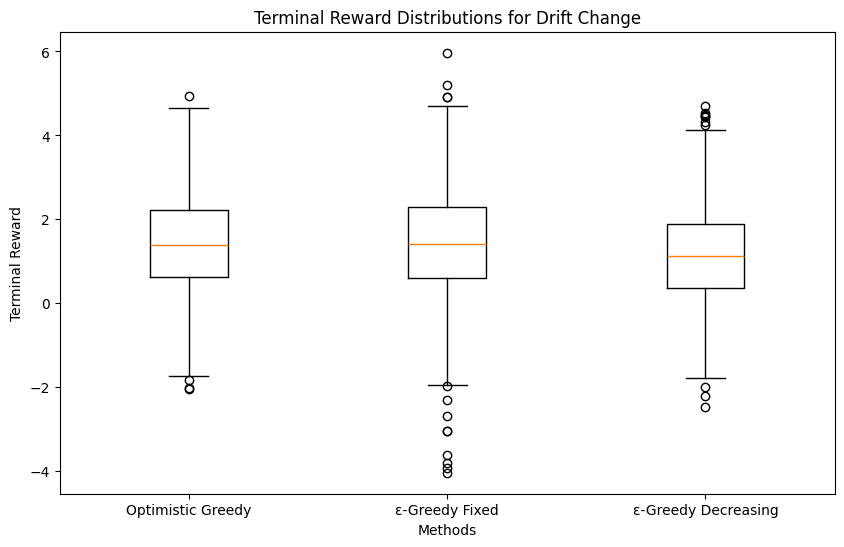

/var/folders/qm/g6dtlq8x3c1c_5lvqgd3372c0000gn/T/ipykernel_48251/3550185037.py:138: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


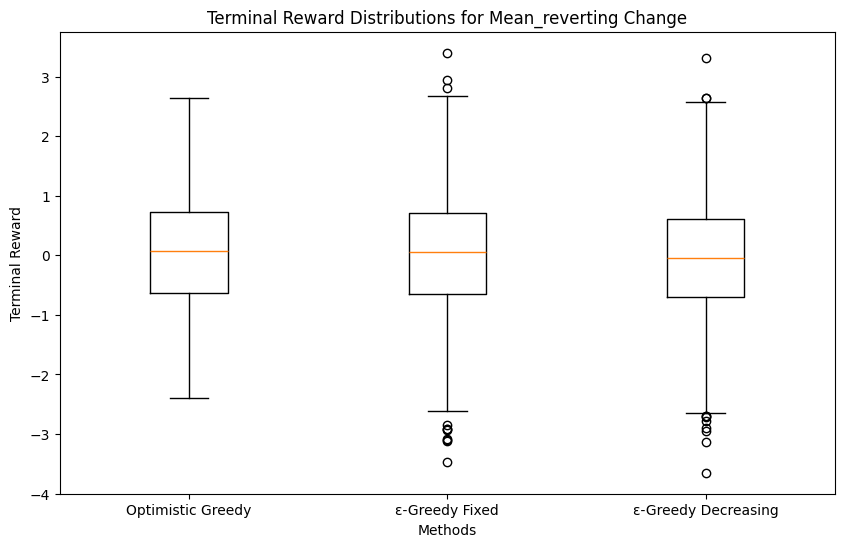

/var/folders/qm/g6dtlq8x3c1c_5lvqgd3372c0000gn/T/ipykernel_48251/3550185037.py:138: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


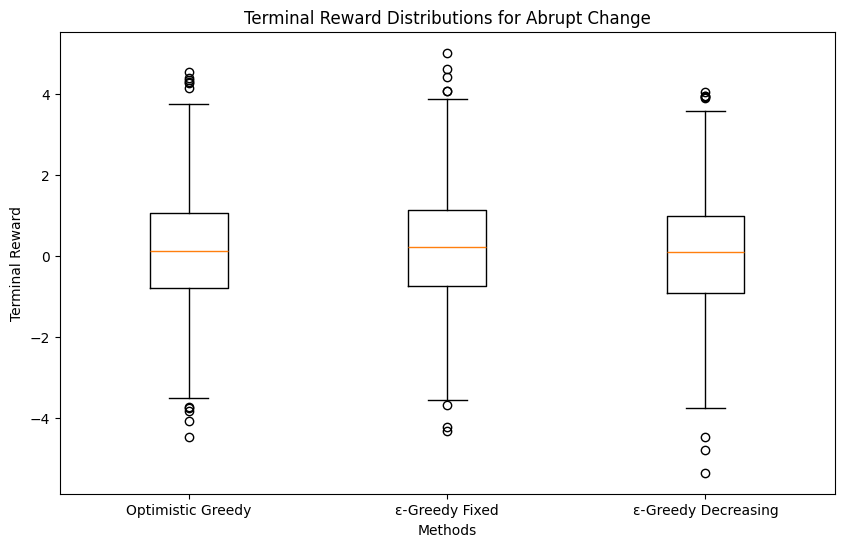

In [27]:
# Set parameters
k = 10
n_problems = 1000
n_steps = 20000
drift_std = 0.001
mean_reverting_std = 0.01
kappa = 0.5
abrupt_change_prob = 0.005

# Function to generate bandit problems
def generate_bandit_problems(k, n_problems):
    """
    Generate true mean values for each action in multiple bandit problems.
    
    Parameters:
    k (int): Number of actions (arms) for each bandit problem.
    n_problems (int): Number of bandit problems to generate.
    
    Returns:
    numpy.ndarray: An array of shape (n_problems, k) containing the true mean values for each action in each bandit problem.
    """
    return np.random.randn(n_problems, k)

# Function to apply drift change to the true means
def apply_drift(true_means):

    return true_means + np.random.normal(0, drift_std, true_means.shape)

# Function to apply mean-reverting change to the true means
def apply_mean_reverting(true_means):
    return kappa * true_means + np.random.normal(0, mean_reverting_std, true_means.shape)

# Function to apply abrupt change to the true means
def apply_abrupt_change(true_means):
    if np.random.rand() < abrupt_change_prob:
        np.random.shuffle(true_means)
    return true_means

# Function to run the optimistic greedy algorithm
def optimistic_greedy(k, n_steps, initial_value, true_means, change_type=None):
    """
    Implement the optimistic greedy method with initial values and non-stationarity handling.
    
    Parameters:
    k (int): Number of actions (arms).
    n_steps (int): Number of steps (iterations) to simulate.
    initial_value (float): Initial optimistic value for action estimates.
    true_means (numpy.ndarray): True mean rewards for each action.
    change_type (str): Type of non-stationarity, e.g., 'drift' for drifting true means.
    
    Returns:
    list: A list of rewards obtained at each step.
    """
    q_values = np.ones(k) * initial_value
    action_counts = np.zeros(k)
    rewards = np.zeros(n_steps)
    
    for step in range(n_steps):
        action = np.argmax(q_values)
        
        reward = np.random.randn() + true_means[action]
        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        
        rewards[step] = reward
        
        # Apply changes to true means
        if change_type == 'drift':
            true_means = apply_drift(true_means)
        elif change_type == 'mean_reverting':
            true_means = apply_mean_reverting(true_means)
        elif change_type == 'abrupt':
            true_means = apply_abrupt_change(true_means)
    
    return rewards

# Function to run the epsilon-greedy algorithm with fixed step size
def epsilon_greedy_fixed(k, n_steps, epsilon, true_means, change_type=None):
    """
    Implement the epsilon-greedy method with a fixed epsilon value.
    
    Parameters:
    k (int): Number of actions (arms).
    n_steps (int): Number of steps (iterations) to simulate.
    epsilon (float): Probability of choosing a random action (exploration).
    true_means (numpy.ndarray): True mean rewards for each action.
    change_type (str): Type of non-stationarity, e.g., 'drift' for drifting true means.
    
    Returns:
    list: A list of rewards obtained at each step.
    """

    #Initialize the estimated action values
    q_values = np.zeros(k)
    # Initialize a count of how many times each action has been selected
    action_counts = np.zeros(k)
    # Initialize an array to store the rewards obtained at each step
    rewards = np.zeros(n_steps)
    # Loop over each step in the simulation
    for step in range(n_steps):
        if np.random.rand() < epsilon:
            action = np.random.choice(k)
        else:
            action = np.argmax(q_values)
        
        reward = np.random.randn() + true_means[action]
        action_counts[action] += 1
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        
        rewards[step] = reward
        
        # Apply changes to true means
        if change_type == 'drift':
            true_means = apply_drift(true_means)
        elif change_type == 'mean_reverting':
            true_means = apply_mean_reverting(true_means)
        elif change_type == 'abrupt':
            true_means = apply_abrupt_change(true_means)
    
    return rewards

# Function to run the epsilon-greedy algorithm with decreasing step size
def epsilon_greedy_decreasing(k, n_steps, epsilon, true_means, change_type=None):
    """
    Implement the epsilon-greedy method with a decreasing epsilon value.
    
    Parameters:
    k (int): Number of actions (arms).
    n_steps (int): Number of steps (iterations) to simulate.
    epsilon (float): Initial epsilon value for exploration, which decreases over time.
    true_means (numpy.ndarray): True mean rewards for each action.
    change_type (str): Type of non-stationarity, e.g., 'drift' for drifting true means.
    
    Returns:
    list: A list of rewards obtained at each step.
    """
    #Initialize the estimated action values
    q_values = np.zeros(k)

    # Initialize a count of how many times each action has been selected
    action_counts = np.zeros(k)

    # Initialize an array to store the rewards obtained at each step
    rewards = np.zeros(n_steps)
    
    # Loop over each step in the simulation
    for step in range(n_steps):
        # Calculate the current epsilon value for the decreasing epsilon-greedy method
        epsilon_t = epsilon / (step + 1)

        # Select an action based on the epsilon-greedy policy
        if np.random.rand() < epsilon_t:

            # With probability epsilon_t, choose a random action (exploration)
            action = np.random.choice(k)
        else:
            # With probability 1 - epsilon_t, choose the action with the highest estimated value (exploitation)
            action = np.argmax(q_values)
        
        # Generate a reward for the chosen action
        reward = np.random.randn() + true_means[action]

        # Update the count of times the chosen action has been selected
        action_counts[action] += 1

        # Update the estimated value (Q-value) of the chosen action using the incremental formula
        q_values[action] += (reward - q_values[action]) / action_counts[action]
        
        # Store the reward obtained at the current step
        rewards[step] = reward
        
        # Apply changes to true means
        if change_type == 'drift':
            true_means = apply_drift(true_means)
        elif change_type == 'mean_reverting':
            true_means = apply_mean_reverting(true_means)
        elif change_type == 'abrupt':
            true_means = apply_abrupt_change(true_means)
    
    return rewards

# Function to evaluate and plot results
def evaluate_methods(k, n_problems, n_steps, initial_value, epsilon, change_type):
    """
    Evaluate three methods (optimistic greedy, fixed epsilon-greedy, and decreasing epsilon-greedy)
    over multiple bandit problems and return the terminal rewards.
    
    Parameters:
    k (int): Number of actions (arms) in each bandit problem.
    n_problems (int): Number of bandit problems to evaluate.
    n_steps (int): Number of steps (iterations) for each bandit problem.
    initial_value (float): Initial optimistic value for the optimistic greedy method.
    epsilon (float): Epsilon value for the epsilon-greedy methods.
    change_type (str): Type of non-stationarity, e.g., 'drift' for drifting true means.
    
    Returns:
    tuple: Three numpy arrays containing the terminal rewards for the optimistic greedy method,
           the fixed epsilon-greedy method, and the decreasing epsilon-greedy method respectively.
    """
    # Generate a set of true mean rewards for each bandit problem
    true_means_set = generate_bandit_problems(k, n_problems)

    # Initialize arrays to store the terminal rewards for each method
    terminal_rewards_optimistic = np.zeros(n_problems)
    terminal_rewards_fixed = np.zeros(n_problems)
    terminal_rewards_decreasing = np.zeros(n_problems)

    
    # Loop over each bandit problem
    for problem in range(n_problems):
        #Extract true means for the current 
        true_means = true_means_set[problem]
        
        # Evaluate the optimistic greedy method and store the terminal reward
        rewards = optimistic_greedy(k, n_steps, initial_value, true_means.copy(), change_type)
        terminal_rewards_optimistic[problem] = rewards[-1]
        
        # Evaluate the fixed epsilon-greedy method and store the terminal reward
        rewards = epsilon_greedy_fixed(k, n_steps, epsilon, true_means.copy(), change_type)
        terminal_rewards_fixed[problem] = rewards[-1]
        
        # Evaluate the decreasing epsilon-greedy method and store the terminal reward
        rewards = epsilon_greedy_decreasing(k, n_steps, epsilon, true_means.copy(), change_type)
        terminal_rewards_decreasing[problem] = rewards[-1]
    
    # Plot results
    data = [terminal_rewards_optimistic, terminal_rewards_fixed, terminal_rewards_decreasing]
    labels = ['Optimistic Greedy', 'ε-Greedy Fixed', 'ε-Greedy Decreasing']
    
    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=labels)
    plt.xlabel('Methods')
    plt.ylabel('Terminal Reward')
    plt.title(f'Terminal Reward Distributions for {change_type.capitalize()} Change')
    plt.show()

# Evaluate methods for different types of changes
initial_value = 10  # Determined from pilot runs
epsilon = 0.1  # Determined from pilot runs

evaluate_methods(k, n_problems, n_steps, initial_value, epsilon, 'drift')
evaluate_methods(k, n_problems, n_steps, initial_value, epsilon, 'mean_reverting')
evaluate_methods(k, n_problems, n_steps, initial_value, epsilon, 'abrupt')
